<h1><center><strong><font color="chillipepper">Lab Session 1: An Introduction to Textual Data</font></strong></center></h1>
<h3><center><font color="blue"><strong>Student Version</strong></font></center></h3>


------------------------

# Overview

Before machine learning algorithms, NLP is all about data: data types, data distribution, data preparation, data representation.

⚠️ Follow the **TODO** to know when you need to code something. 
Sometimes, the expected output is still there to help you understand what you need to do. ⚠️

## Course takeaways

- The Why of NLP
- What is NLP ? the four challenges of NLP
- NLP in two pipelines
- Data exploration and preparation

## Lab session Prerequisites

- Python 
- Pandas 

For those not familiar with pandas https://pandas.pydata.org/docs/getting_started/index.html

## Lab session in a nutshell 

- First step with a textual dataset 
- Basic Tokenization (Word Segmentation) of a dataset 
- Compute Vocabulary and Zipf's law
- Introduction to Regex 
- A basic comparison of two datasets
- Hands on some processing tools (POS, NER, parsing) 
- A glimpse of topic models 

## Resources: 

- NLTK: https://www.nltk.org/api/nltk.tokenize.html 
- PANDAS: https://pandas.pydata.org/docs/getting_started/index.html
- SPACY: https://spacy.io/usage/spacy-101 

## Databases: 

We will use the following databases:
1. [BBC News Classification dataset](https://www.kaggle.com/c/learn-ai-bbc/overview): a corpus that we will download from our gitlab (so you don't have to register to kaggle) and extract manually
2. [Amazon Review dataset](https://huggingface.co/datasets/amazon_reviews_multi): a multilingual corpus that we will retrieve from the [Datasets](https://huggingface.co/datasets) library

## Tasks

### 1. Basic preprocessing
- [ ] Open the database. Generate simple statistics about the articles. How many unique articles are there? What is the mean length of articles (considering characters)? 

- [ ] Generate simple statistics about the annotators' data for each article. Do the annotations seem consistent? 

### 2. Word-level preprocessing
- [ ] Split the articles into list of words. How many different words are there in the vocabulary? 

- [ ] Split the articles into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?

- [ ] Check if Zipf's law applies. 

### 3. Domain specificity and regex
- [ ] Use regex to retrieve numbers (ints, floats, %, years, ...) using a regex. 

- [ ] How many percent of characters are numbers (as defined above) in a given article? 

- [ ] Is there any relationship between the percentage of numbers in an article and the content length? 

### 4. Dataset Comparison
Merge datasets and compare some basic statistics

### 5. Classic NLP pipeline
- [ ] Re-tokenize using spacy

- [ ] Lemmatize using spacy

- [ ] POS tagging using spacy, plot the trees

- [ ] NER using spacy, give the amount of each entity type for a given title, and compare it to the title length. 

### 6. Topic Modelling
- Use Gensim's LDA to compute a topic model. 

- Use PyLDAvis to visualise the topic model. What are the different topic clusters?


# <font color="chillipepper">**Imports and Installation** 📂</font>

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
! pip3 install datasets

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (17.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=398819 sha256=80ea4380922ed9f88417ae2eeb6ed3fc24496d11e15d685c7be162e9a9a4b154
  Stored in directory: C:\Users\clemm\AppData\Local\Temp\pip-ephem-wheel-cache-zdmt9n1s\wheels\07\29\61\f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
Successfully built ydata-profiling
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 4.18.0
    Uninstalling ydata-profiling-4.18.0:
      Successfully uninstalled ydata-profiling-4.18.0
  Using cached d

In [7]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

from functools import reduce
from operator import add
from termcolor import colored

# <font color="chillipepper">**Data Download** 💾</font>

In [8]:
! wget https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/raw/master/bbc-news-data.zip
! unzip bbc-news-data.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


# <font color="chillipepper">**Data Basic Exploration** 📊</font>

We first start by opening the database and load it as a **Pandas dataframe**.

Documentation:
- https://pandas.pydata.org/docs/

In [9]:
df = pd.read_csv('./bbc-news-data.csv', sep='\t')
print("Shape:  {0}".format(df.shape))
df.head()

Shape:  (2225, 4)


category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   
2  business  003.txt  Yukos unit buyer faces loan claim   
3  business  004.txt  High fuel prices hit BA's profits   
4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  
0   Quarterly profits at US media giant TimeWarne...  
1   The dollar has hit its highest level against ...  
2   The owners of embattled Russian oil giant Yuk...  
3   British Airways has blamed high fuel prices f...  
4   Shares in UK drinks and food firm Allied Dome...

Our dataframe have the following columns:

In [10]:
df.columns

Index(['category', 'filename', 'title', 'content'], dtype='object')

### 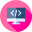 **TODO!** Print the number of different articles in the database.

Tip: You may need the `.unique()` function of Pandas.

In [21]:
# Number of different articles in the database
len(df['filename'].unique())

511

In [22]:
df['filename'].duplicated().sum()

np.int64(1714)

### 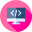 **TODO!** print the mean length (*i.e.* number of characters) of the `content` column

Tip: You may need the `.mean()` function of Pandas.

In [23]:
# Mean length of content in characters
np.mean(df['content'].str.len())

np.float64(2232.793258426966)

### 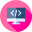 **TODO!** display the different article categories as a list

In [24]:
# display the different article categories
df['category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

### 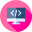 **TODO!** Display the repartition of the content lengths (characters) as an histogram.

Tip: See the `.hist()` function of Pandas.

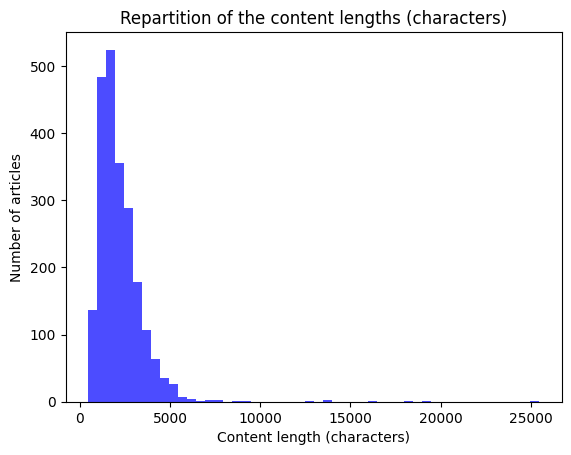

In [28]:
# Repartition of the content lengths (characters)
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df['content'].str.len(), bins=50, color='blue', alpha=0.7)
plt.title('Repartition of the content lengths (characters)')
plt.xlabel('Content length (characters)')
plt.ylabel('Number of articles')
plt.show()

### 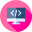 **TODO!** display the number of articles per `category`.

Tip: You may need the `.groupby()` function of Pandas.

In [29]:
# We check the number of article per category
df['category'].value_counts()


category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

### 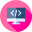 **TODO!** Display the histogram of the number of articles per category

<Axes: xlabel='category'>

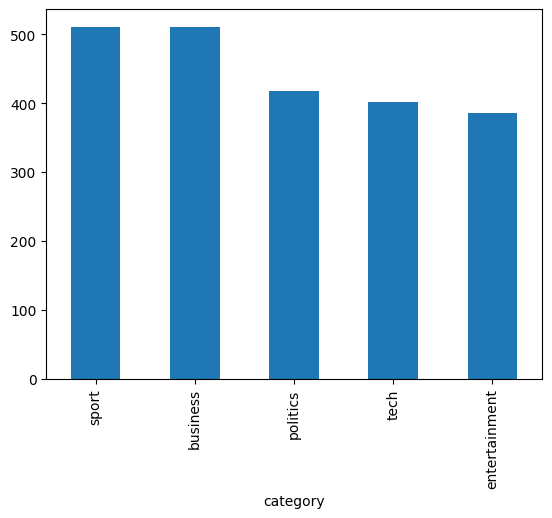

In [30]:
# And plot a histogram
df['category'].value_counts().plot(kind='bar')


### 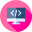 **TODO!** Let's add some basic information about the text: number of "words". Put them into new `title_len` and `content_len` columns. 

Tip: just split the text according to the spaces. You may need the `apply()` function from Pandas

In [31]:
# let's add some basic information about the text: number of "words" (here we only split by a space, a really naive approach)
df['content_len'] = df["content"].apply(lambda s: len(s.split()))
df['title_len'] = df["title"].apply(lambda s: len(s.split()))

In [32]:
df

category filename                              title  \
0     business  001.txt  Ad sales boost Time Warner profit   
1     business  002.txt   Dollar gains on Greenspan speech   
2     business  003.txt  Yukos unit buyer faces loan claim   
3     business  004.txt  High fuel prices hit BA's profits   
4     business  005.txt  Pernod takeover talk lifts Domecq   
...        ...      ...                                ...   
2220      tech  397.txt   BT program to beat dialler scams   
2221      tech  398.txt    Spam e-mails tempt net shoppers   
2222      tech  399.txt            Be careful how you code   
2223      tech  400.txt    US cyber security chief resigns   
2224      tech  401.txt   Losing yourself in online gaming   

                                                content  content_len  \
0      Quarterly profits at US media giant TimeWarne...          415   
1      The dollar has hit its highest level against ...          379   
2      The owners of embattled Russian oil giant Yuk...          258   
3      British Airways has blamed high fuel prices f...          400   
4      Shares in UK drinks and food firm Allied Dome...          260   
...                                                 ...          ...   
2220   BT is introducing two initiatives to help bea...          414   
2221   Computer users across the world continue to i...          352   
2222   A new European directive could put software w...         1045   
2223   The man making sure US computer networks are ...          374   
2224   Online role playing games are time-consuming,...         2964   

      title_len  
0             6  
1             5  
2             6  
3             6  
4             5  
...         ...  
2220          6  
2221          5  
2222          5  
2223          5  
2224          5  

[2225 rows x 6 columns]

Here you can see how to display a `ProfileReport()` from PandasProfiling.

Play with it and explore the interactive report.

In [33]:
# Let's create an automatic and interactive report of the BBC News dataset
profile = ProfileReport(df, title="BBC News", html={"style": {"full_width": True}})

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 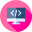 **TODO!** print the standard deviation for each article's title length `title_len` and content length `content_len`.

Tip: you may need the `.std()` function from Pandas

In [38]:
eval_cols = ["title_len", 'content_len']
df[eval_cols].describe()

title_len  content_len
count  2225.000000  2225.000000
mean      5.204494   378.835955
std       0.865494   238.220755
min       3.000000    84.000000
25%       5.000000   240.000000
50%       5.000000   326.000000
75%       6.000000   466.000000
max       9.000000  4428.000000

### 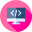 **TODO!** Complete the following code with your solution from previous TODO. This will display the plots for standard deviation distribution of `title_len` and `content_len`.

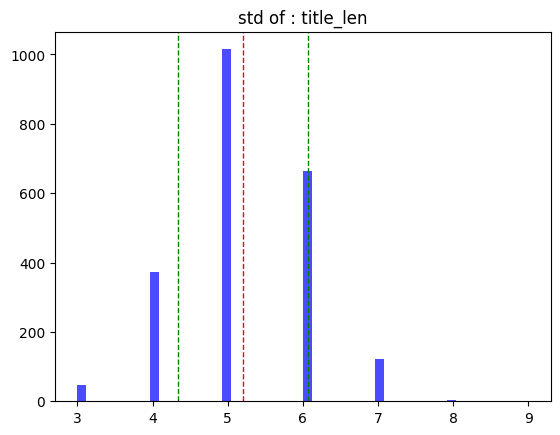

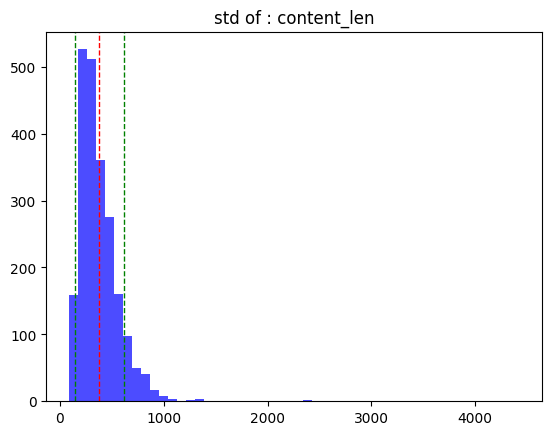

In [42]:
import matplotlib.pyplot as plt

for col in eval_cols:
  plt.figure()
  plt.title("std of : {0}".format(col))
  
  std = df[col].std()
  
  # here goes the hist() generation code
  plt.hist(df[col], bins=50, color='blue', alpha=0.7)
  plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1)
  plt.axvline(df[col].mean() + std, color='green', linestyle='dashed', linewidth=1)
  plt.axvline(df[col].mean() - std, color='green', linestyle='dashed', linewidth=1)
  plt.plot()

# <font color="chillipepper">**Word-level Preprocessing**</font>

### 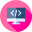 **TODO!** Split the content into list of words. How many different words are there in the vocabulary?

In [47]:
# List of words with separator = " "
arr = df.content.drop_duplicates().apply(lambda x: x.split(' ')).array

# Now we flatten the list of lists into a single level list. 
# put it into a set
# and get its length
vocab = set(reduce(add, arr))
len(vocab)

64779

In [48]:
# same for titles
# List of words with separator = " "
arr = df.title.drop_duplicates().apply(lambda x: x.split(' ')).array

# Now we flatten the list of lists into a single level list. 
# put it into a set
# and get its length
vocab = set(reduce(add, arr))
len(vocab)

4475

### 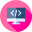 **TODO!** Split the content into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?

In [53]:
# https://www.nltk.org/api/nltk.tokenize.html 
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer
# e.g : tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]
tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]

In [55]:
tokenizers[0].tokenize("This is a sample sentence, with punctuation!")

['This', 'is', 'a', 'sample', 'sentence', ',', 'with', 'punctuation', '!']

In [56]:
tokenizers[1].tokenize("This is a sample sentence, with punctuation!")

['This', 'is', 'a', 'sample', 'sentence', ',', 'with', 'punctuation', '!']

In [58]:
tokenizers[2].tokenize("This is a sample sentence, with punctuation!")

['This', 'is', 'a', 'sample', 'sentence', ',', 'with', 'punctuation', '!']

If you look at the first 30 tokens, the `TweetTokenizer` is the only one to separate "bn" from "1.13" in "1.13bn".

### 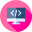 **TODO!** Check if Zipf's law applies.

Complete the following code.

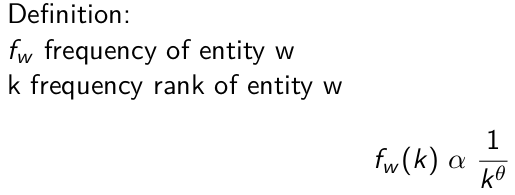

  0%|          | 0/3 [00:00<?, ?it/s]

Counter({'the': 41922, ',': 33355, 'to': 23016, 'of': 18551, 'and': 16858, 'a': 16227, 'in': 15506, '``': 10530, "''": 8756, "'s": 8327, 'is': 8040, 'for': 7949, 'The': 7494, 'that': 7278, 'on': 6681, 'was': 5755, 'said': 5475, 'be': 5359, 'it': 5203, 'with': 4766, 'has': 4674, 'have': 4495, 'as': 4330, 'at': 4112, 'will': 4104, 'he': 4097, 'by': 4066, 'are': 4062, 'I': 3695, '.': 3547, 'not': 3342, 'from': 3242, '-': 3009, 'Mr': 2796, 'his': 2687, 'an': 2544, 'but': 2507, 'would': 2458, 'had': 2447, 'which': 2407, 'been': 2346, 'they': 2323, 'their': 2203, ')': 2114, '(': 2112, 'were': 2066, 'this': 2055, 'its': 2045, 'more': 1987, 'also': 1955, 'It': 1940, 'who': 1935, '%': 1837, 'we': 1790, 'up': 1739, 'people': 1691, 'But': 1690, 'about': 1639, ':': 1568, 'can': 1558, 'He': 1500, 'than': 1499, 'or': 1498, 'after': 1488, 'could': 1431, 'out': 1391, 'one': 1356, 'new': 1353, 'said.': 1328, 'US': 1311, 'year': 1290, 'all': 1234, 'over': 1215, 'do': 1201, 'you': 1177, 'there': 1171, 'l

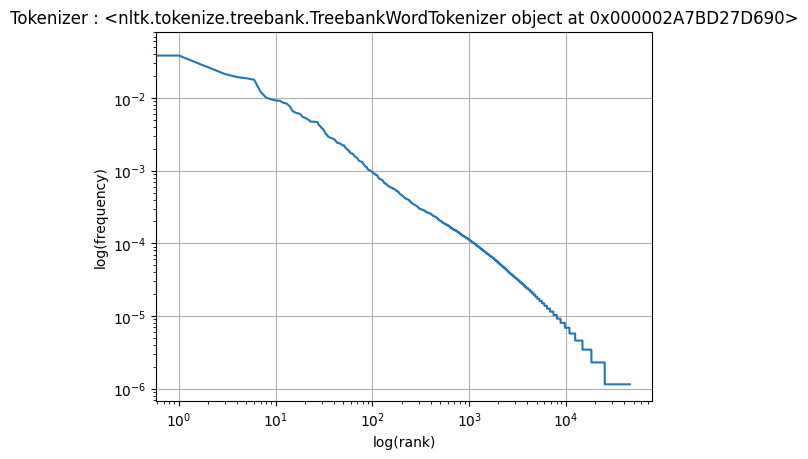

 33%|███▎      | 1/3 [00:06<00:12,  6.03s/it]

Counter({'the': 41925, ',': 33355, 'to': 23014, '"': 19265, 'of': 18551, 'and': 16858, 'a': 16234, 'in': 15505, "'": 12332, 's': 8329, 'is': 7982, 'for': 7947, 'The': 7496, 'that': 7279, 'on': 6681, 'was': 5693, 'said': 5392, 'be': 5361, 'it': 5200, 'with': 4766, 'has': 4656, 'have': 4451, 'as': 4330, 'at': 4112, 'will': 4105, 'he': 4097, 'by': 4067, 'are': 4042, 'I': 3714, 'from': 3241, 'not': 3182, '-': 3009, 'Mr': 2796, 'his': 2687, 'an': 2545, 'but': 2507, 'had': 2440, 'which': 2407, 'would': 2407, 'been': 2346, 'they': 2323, 'their': 2203, ')': 2114, '(': 2112, '.': 2061, 'this': 2055, 'were': 2050, 'its': 2045, 'more': 1985, 'also': 1955, 'It': 1940, 'who': 1936, '%': 1837, 'we': 1791, 'up': 1740, 'people': 1691, 'But': 1690, 'about': 1639, ':': 1596, 'can': 1523, 'He': 1500, 'than': 1499, 'or': 1499, 'after': 1487, 'said.': 1411, 'could': 1397, 'out': 1389, 'one': 1357, 'new': 1354, '£': 1305, 'US': 1297, 'year': 1267, 'all': 1235, 'over': 1215, 'you': 1181, 'there': 1169, 'last

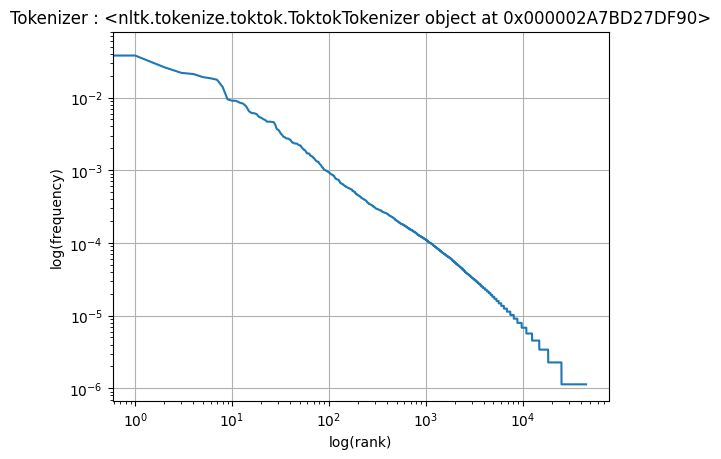

 67%|██████▋   | 2/3 [00:09<00:04,  4.40s/it]

Counter({'the': 41925, '.': 38402, ',': 33363, 'to': 23041, '"': 19265, 'of': 18557, 'and': 16869, 'a': 16233, 'in': 15552, 'is': 8017, 'for': 7973, 'The': 7500, 'that': 7247, 'said': 6803, 'on': 6739, 'was': 5701, 'be': 5389, 'it': 5058, 'with': 4789, 'has': 4658, 'have': 4456, 'as': 4330, 'at': 4116, 'will': 4115, 'by': 4071, 'are': 4055, 'he': 3999, '-': 3616, 'from': 3250, 'not': 3209, 'I': 3096, 'Mr': 2806, 'his': 2691, 'an': 2545, 'but': 2507, 'had': 2448, 'would': 2410, 'which': 2408, 'been': 2348, 'they': 2250, 'their': 2203, 'this': 2100, '(': 2095, ')': 2076, 'were': 2058, 'its': 2045, 'more': 2015, 'also': 1956, 'who': 1930, '%': 1837, 'up': 1794, 'people': 1691, 'But': 1690, 'about': 1654, 'we': 1629, ':': 1563, "'": 1541, 'It': 1521, 'or': 1508, 'than': 1499, 'after': 1489, 'year': 1487, 'out': 1472, 'He': 1454, 'can': 1410, 'could': 1398, 'one': 1393, 'US': 1379, 'new': 1358, '£': 1306, 'all': 1269, 'over': 1249, 'last': 1165, 'there': 1162, 'first': 1156, '$': 1148, 'you

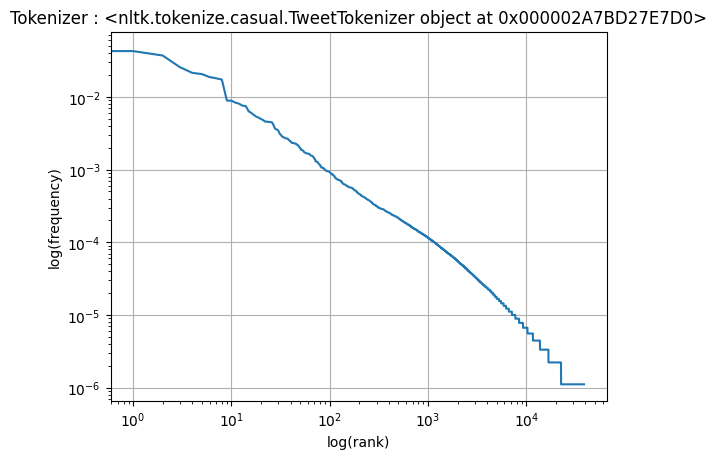

100%|██████████| 3/3 [00:16<00:00,  5.57s/it]


In [61]:
# This import allows you to count the occurrences of each different elements in a list
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm


for tok in tqdm(tokenizers):
  # get the counter of words
  # example usage: a = [1, 1, 2, 5, 6, 5]; print(Counter(a))

  arr = df.content.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  # We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
  arr = [ x for X in arr for x in X]
  c = Counter(arr)
  print(c)
  # then use the following code to plot
  # Formating the counter object to a proper dataset
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  # Computing frequencies instead of occurences
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # Sorting by frequency, most frequent word at the top of the df
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(tok))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

# <font color="chillipepper">**Domain specificity and regex**</font>


### 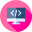 **TODO!** Use regex to retrieve numbers (ints, floats, %, years, ...) in article contents.


*Regex cheasheet* : see python's re module documentation https://docs.python.org/3/library/re.html  

*Other ressources* : 

- A good website to write and test regular expressions : 
https://regex101.com/
- A good game to learn regex : https://alf.nu/RegexGolf 


In [62]:
# See an example of a full article content:
print(df.content.iloc[0])

 Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-spe

In [76]:
import re
# Regular expression that matches any sequence of numbers:
nb = '[0-9]+' # retrieve all numbers : ([0-9] == from 0 to 9, and + allows multiple matches)
floats = '[0-9]+\.[0-9]+' # retrieve all float numbers
percentages = '[0-9]+%' # retrieve all percentages
years = '[0-9]{4}' # retrieve all years (four digits)

df1 = df.drop_duplicates("content")

retrived_numbers = re.findall(nb, df1.content.iloc[0])
retrived_floats = re.findall(floats, df1.content.iloc[0])
retrived_percentages = re.findall(percentages, df1.content.iloc[0])
retrived_years = re.findall(years, df1.content.iloc[0])

nb_types = ['ints', 'floats', 'percents', 'years']
retrived_values = {"numbers": retrived_numbers, "floats": retrived_floats, "percentages": retrived_percentages, "years": retrived_years}

In [77]:
retrived_values

{'numbers': ['76',
  '1',
  '13',
  '600',
  '639',
  '2',
  '11',
  '1',
  '10',
  '9',
  '8',
  '464',
  '000',
  '8',
  '2000',
  '2003',
  '27',
  '284',
  '3',
  '36',
  '27',
  '2003',
  '6',
  '4',
  '42',
  '09',
  '2005',
  '5',
  '300',
  '500'],
 'floats': ['1.13', '11.1', '10.9', '3.36', '6.4', '42.09'],
 'percentages': ['76%', '2%', '8%', '8%', '27%', '27%', '4%', '5%'],
 'years': ['2000', '2003', '2003', '2005']}

In [79]:
# Regular expression that matches any sequence of numbers:
int_prog = re.compile('[0-9]+')
float_prog = re.compile('[0-9]+\.?[0-9]*')
percent_prog = re.compile('[0-9]+\.?[0-9]*%')
year_prog = re.compile('[12][089][0-9][0-9]') # a year between 1800 and 2099. # 1[89][0-9][0-9]|20[0-9][0-9]
df1 = df.drop_duplicates('content')  # Don't forget to compute over unique elements if it applies
# Calculating number of matches for every abstract
progs = [int_prog, float_prog, percent_prog, year_prog]
nb_types = ['ints', 'floats', 'percents', 'years']
for prog, nb_type in zip(progs, nb_types):
  df1[nb_type] = df1['content'].apply(lambda x: len(prog.split(x))-1).array
df1[nb_types].head()

C:\Users\clemm\AppData\Local\Temp\ipykernel_28068\2343694234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nb_type] = df1['content'].apply(lambda x: len(prog.split(x))-1).array
C:\Users\clemm\AppData\Local\Temp\ipykernel_28068\2343694234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nb_type] = df1['content'].apply(lambda x: len(prog.split(x))-1).array
C:\Users\clemm\AppData\Local\Temp\ipykernel_28068\2343694234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

ints  floats  percents  years
0    30      24         8      4
1     7       5         0      2
2     7       5         0      0
3    37      30         8      4
4    18      11         3      1

### 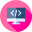 **TODO!** How many percent of characters are numbers (as defined above) in a given article?


array([[<Axes: title={'center': 'ints'}>,
        <Axes: title={'center': 'floats'}>],
       [<Axes: title={'center': 'percents'}>,
        <Axes: title={'center': 'years'}>]], dtype=object)

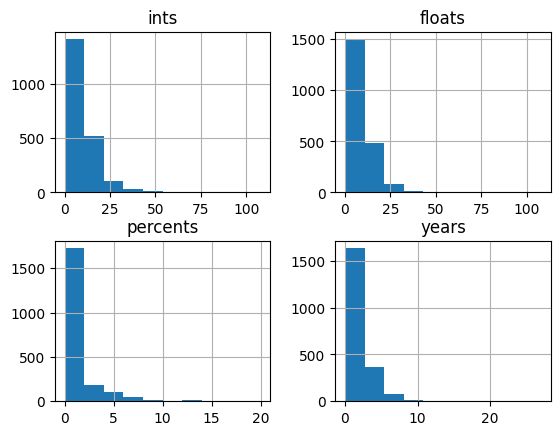

In [81]:
df1[nb_types].hist()

In [83]:
nb_percent_types = [''.join([t, '%']) for t in nb_types]
# code me

df1 = df.drop_duplicates('content')

for prog, nb_type in zip(progs, nb_percent_types):
  df1[nb_type] = df1['content'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
df1[nb_percent_types+['content']].head()

C:\Users\clemm\AppData\Local\Temp\ipykernel_28068\1882167077.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nb_type] = df1['content'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
C:\Users\clemm\AppData\Local\Temp\ipykernel_28068\1882167077.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nb_type] = df1['content'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
C:\Users\clemm\AppData\Local\Temp\ipykernel_28068\1882167077.py:7: SettingWithCopyWarnin

ints%   floats%  percents%    years%  \
0  2.574257  2.811881   0.831683  0.633663   
1  0.585849  0.675980   0.000000  0.360523   
2  0.922874  1.054713   0.000000  0.000000   
3  3.168568  3.464301   1.098437  0.675961   
4  1.628664  2.084691   0.521173  0.260586   

                                             content  
0   Quarterly profits at US media giant TimeWarne...  
1   The dollar has hit its highest level against ...  
2   The owners of embattled Russian oil giant Yuk...  
3   British Airways has blamed high fuel prices f...  
4   Shares in UK drinks and food firm Allied Dome...

array([[<Axes: title={'center': 'ints%'}>,
        <Axes: title={'center': 'floats%'}>],
       [<Axes: title={'center': 'percents%'}>,
        <Axes: title={'center': 'years%'}>]], dtype=object)

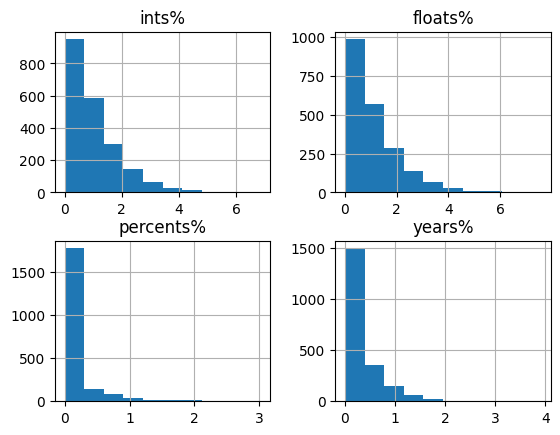

In [84]:
df1[nb_percent_types].hist()

Compute these histograms for each category with the following code.

C:\Users\clemm\AppData\Local\Temp\ipykernel_28068\677237160.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nb_type] = df1['content'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
C:\Users\clemm\AppData\Local\Temp\ipykernel_28068\677237160.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nb_type] = df1['content'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
C:\Users\clemm\AppData\Local\Temp\ipykernel_28068\677237160.py:10: SettingWithCopyWarnin

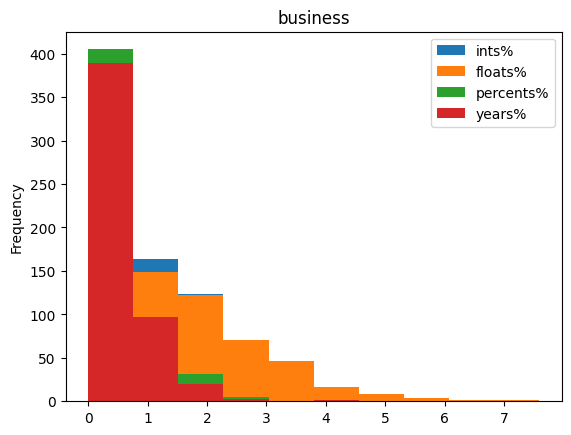

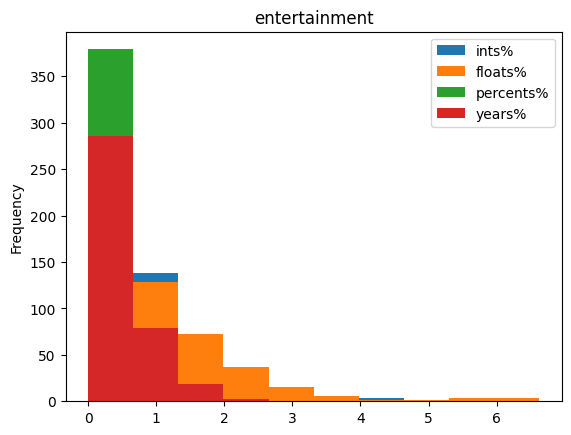

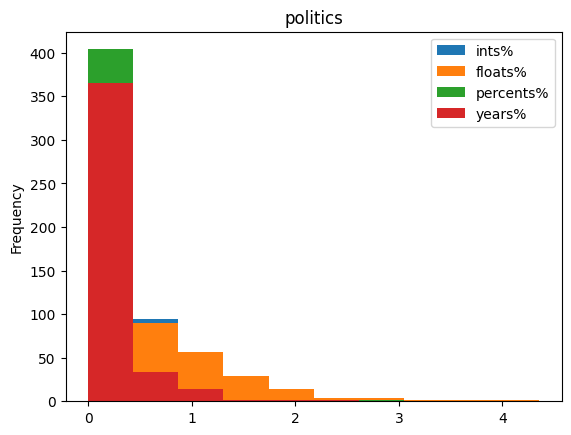

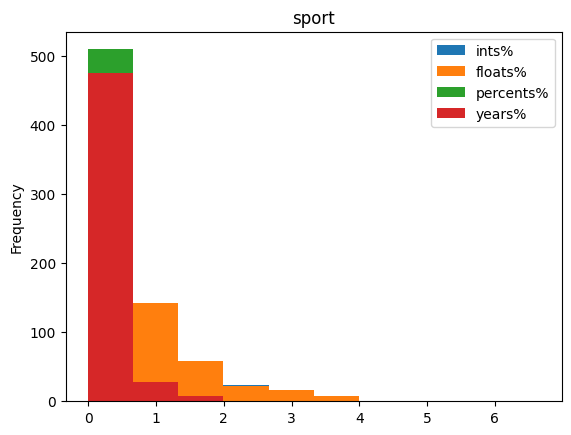

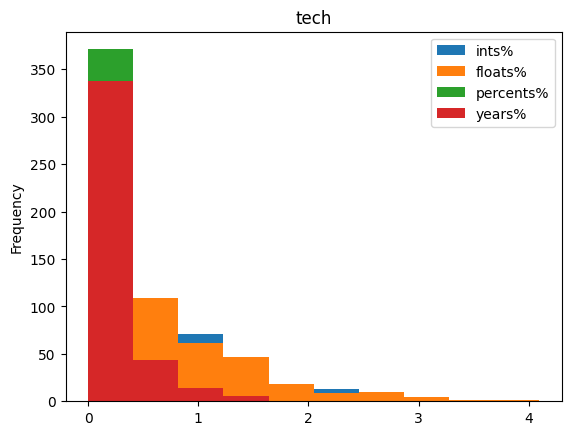

In [85]:
categories = list(df.category.drop_duplicates().values)
for category in categories:
  # filter by category
  is_category = df['category']==category
  df1 = df[is_category]
  
  nb_percent_types = [''.join([t, '%']) for t in nb_types]

  for prog, nb_type in zip(progs, nb_percent_types):
    df1[nb_type] = df1['content'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array

  ax = df1[nb_percent_types].plot(kind='hist',subplots=False,sharex=True,sharey=True,title='%s' % (category))


### Is there any relationship between the percentage of numbers in an article and the content length?

Here is a way to apply custom explorations. Of course, you could also add a dedicated column and simply run again pandas profiling for a `ProfileReport(df)`

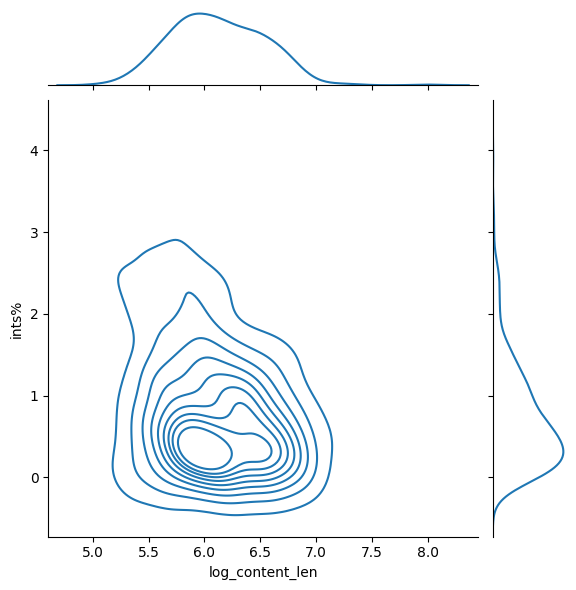

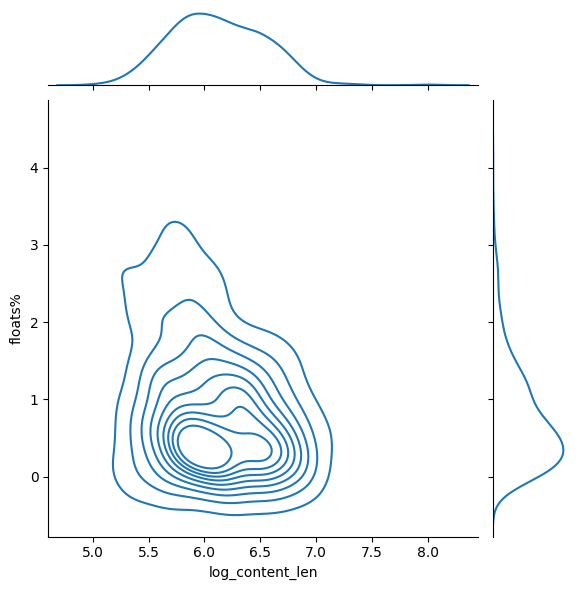

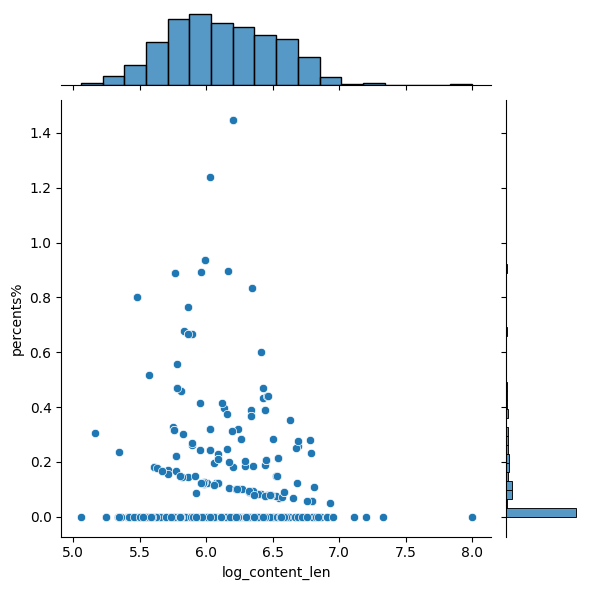

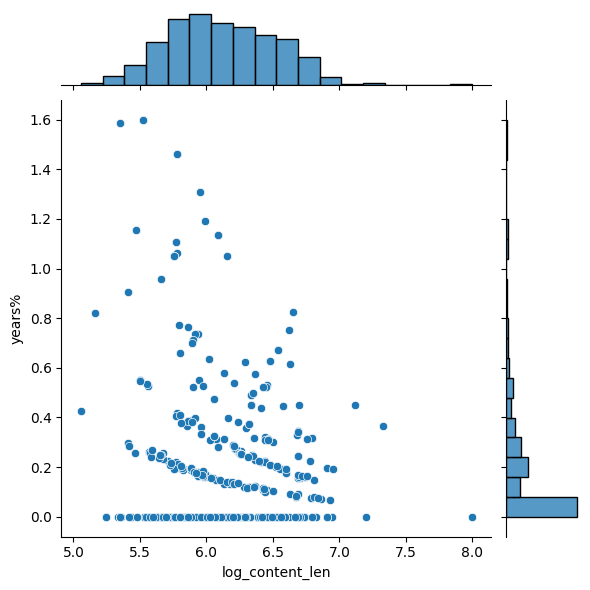

In [86]:
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
from warnings import filterwarnings
filterwarnings('ignore')

# Plotting the percentages against the corresponding log(citations)
df1['log_content_len'] = np.log(df1['content_len'].array)
for nb_type in nb_percent_types:
  # We will plot percents and years differently, as their scarcity creates a
  # matplotlib overflow when plotting a kde plot
  if nb_type in ['percents%', 'years%']:
    sns.jointplot(data=df1, x='log_content_len', y=nb_type)
    #pass
  else:
    sns.jointplot(data=df1, kind='kde', x='log_content_len', y=nb_type)#annotate(pearsonr)#
    plt.show()
  

# <font color="chillipepper">**Multiple Dataset Comparison**</font>

Let's download the second dataset.

In [91]:
from datasets import load_dataset

# Download the datasets
amazon = pd.read_csv('amazon/train.csv',index_col=0)
print(amazon)

        review_id          product_id          reviewer_id  stars  \
0      de_0591095  product_de_0301773  reviewer_de_0787123      1   
1      de_0987834  product_de_0720578  reviewer_de_0983846      1   
2      de_0978206  product_de_0499114  reviewer_de_0238704      1   
3      de_0407600  product_de_0648552  reviewer_de_0102048      1   
4      de_0453469  product_de_0900029  reviewer_de_0862313      1   
...           ...                 ...                  ...    ...   
29995  zh_0308152  product_zh_0363847  reviewer_zh_0620841      5   
29996  zh_0520500  product_zh_0078292  reviewer_zh_0245797      5   
29997  zh_0904534  product_zh_0732172  reviewer_zh_0349032      5   
29998  zh_0205421  product_zh_0913615  reviewer_zh_0084978      5   
29999  zh_0806847  product_zh_0089067  reviewer_zh_0430543      5   

                                             review_body  \
0      Das Produkt kam bis heute nicht bei mir an. Ic...   
1      Gebrauchte Spinner, teilzerlegt und teilweis

Now we transform the Hugging Face's `Dataset` object into a Pandas dataframe and retrieve the desired languages to reduce the size.

### 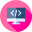 **TODO!** select only the english reviews.

In [94]:
amazon_df_en = amazon[ amazon['language']=='en' ]

## Compare BBC News and Amazon Reviews datasets (English only)

In [95]:
# let's save some RAM
del amazon

### 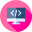 **TODO!** Compare the number of article per category in BBCNews and Amazon

In [96]:
# number of article per category
print( dict(df.drop_duplicates().groupby(df.category).size()) )
print( dict(amazon_df_en.drop_duplicates().groupby(amazon_df_en.product_category).size()) )

{'business': np.int64(510), 'entertainment': np.int64(386), 'politics': np.int64(417), 'sport': np.int64(511), 'tech': np.int64(401)}
{'apparel': np.int64(401), 'automotive': np.int64(178), 'baby_product': np.int64(75), 'beauty': np.int64(344), 'book': np.int64(82), 'camera': np.int64(52), 'digital_ebook_purchase': np.int64(149), 'digital_video_download': np.int64(45), 'drugstore': np.int64(316), 'electronics': np.int64(182), 'furniture': np.int64(59), 'grocery': np.int64(105), 'home': np.int64(390), 'home_improvement': np.int64(194), 'industrial_supplies': np.int64(60), 'jewelry': np.int64(56), 'kitchen': np.int64(266), 'lawn_and_garden': np.int64(195), 'luggage': np.int64(33), 'musical_instruments': np.int64(24), 'office_product': np.int64(117), 'other': np.int64(362), 'pc': np.int64(153), 'personal_care_appliances': np.int64(1), 'pet_products': np.int64(182), 'shoes': np.int64(124), 'sports': np.int64(225), 'toy': np.int64(217), 'video_games': np.int64(31), 'watch': np.int64(14), 'w

### 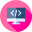 **TODO!** Compare the mean number of character per article content and title for both BBC News and Amazon

In [97]:
# mean content length (characters)
print('Mean number of character per element')
print( colored('BBCNews', 'blue'), df.content.drop_duplicates().apply(len).mean())
print( colored('Amazon ', 'yellow'),  amazon_df_en.review_body.drop_duplicates().apply(len).mean())

Mean number of character per element
BBCNews 2232.1692160611856
Amazon  180.48169633926784


In [98]:
# mean title length (characters)
print('Mean number of character per title')
print( colored('BBCNews', 'blue'), df.title.drop_duplicates().apply(len).mean())
print( colored('Amazon ', 'yellow'), amazon_df_en.review_title.drop_duplicates().apply(lambda x: len(str(x))).mean())

Mean number of character per title
BBCNews 31.329198473282442
Amazon  27.297155151804926


### 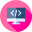 **TODO!** Concatenate both dataframes into one, with the following mapping.


In [99]:
columns_to_keep = ['review_id', 'review_body', 'review_title', 'product_category']
columns_newnames = {'review_id':'filename','review_body':'content','review_title':'title', 'product_category':'category'}
bbcamazon = pd.concat([df,amazon_df_en[columns_to_keep].rename(columns=columns_newnames)], ignore_index=True)

In [100]:
bbcamazon

category    filename                              title  \
0         business     001.txt  Ad sales boost Time Warner profit   
1         business     002.txt   Dollar gains on Greenspan speech   
2         business     003.txt  Yukos unit buyer faces loan claim   
3         business     004.txt  High fuel prices hit BA's profits   
4         business     005.txt  Pernod takeover talk lifts Domecq   
...            ...         ...                                ...   
7220          home  en_0447642                           So Cute!   
7221       kitchen  en_0950370                            Perfect   
7222  pet_products  en_0203466             My Doberman Loves Them   
7223         other  en_0010627                         Five Stars   
7224       apparel  en_0290511                        SUPER CUTE!   

                                                content  content_len  \
0      Quarterly profits at US media giant TimeWarne...        415.0   
1      The dollar has hit its highest level against ...        379.0   
2      The owners of embattled Russian oil giant Yuk...        258.0   
3      British Airways has blamed high fuel prices f...        400.0   
4      Shares in UK drinks and food firm Allied Dome...        260.0   
...                                                 ...          ...   
7220  This ribbon is so adorable! Goes perfect with ...          NaN   
7221                     I am in love with this kettle.          NaN   
7222  My Doberman Loves Having His Nails Trimmed and...          NaN   
7223  I love my Fire.. I do everything on it, read, ...          NaN   
7224  A wish I would've ordered one size smaller (I ...          NaN   

      title_len  
0           6.0  
1           5.0  
2           6.0  
3           6.0  
4           5.0  
...         ...  
7220        NaN  
7221        NaN  
7222        NaN  
7223        NaN  
7224        NaN  

[7225 rows x 6 columns]

In [101]:
# let's save some RAM
del df
del amazon_df_en

### 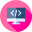 **TODO!** Add columns `content_len` and `title_len` dedicated to store the content length from better tokenized text 

Tip: use `TweetTokenizer()` from nltk and `.apply()` function from Pandas

In [104]:
from nltk.tokenize import TweetTokenizer

# Apply the tokenizer to the text and create a column dedicated to it. Same goes for the title.
tokenizer = TweetTokenizer()
bbcamazon['content_tokenized'] = bbcamazon.content.apply(lambda x: tokenizer.tokenize(x))
bbcamazon['title_tokenized'] = bbcamazon.title.apply(lambda x: tokenizer.tokenize(str(x)))

In [106]:
# Replace text len using the tokenized values
bbcamazon['content_len_tokenized'] = bbcamazon.content_tokenized.apply(lambda x: len(x))
bbcamazon['title_len_tokenized'] = bbcamazon.title_tokenized.apply(lambda x: len(x))

In [108]:
# Recalculate the title_len and content_len for all elements
bbcamazon['content_len'] = bbcamazon.content.apply(lambda x: len(x.split(' ')))
bbcamazon['title_len'] = bbcamazon.title.apply(lambda x: len(str(x).split(' ')))

### 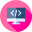 **TODO!** Add a `source` column specifying whether an article is from Amazon or BBC News

In [109]:
# Let's add an indication about the source using the filename type
bbcamazon['source'] = bbcamazon.filename.apply(lambda x: 'bbcnews' if '.txt' in x else 'amazon')

Now let's have a glimpse of our concatenated and enriched data.

In [110]:
bbcamazon.head()

category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   
2  business  003.txt  Yukos unit buyer faces loan claim   
3  business  004.txt  High fuel prices hit BA's profits   
4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  content_len  title_len  \
0   Quarterly profits at US media giant TimeWarne...          421          6   
1   The dollar has hit its highest level against ...          383          5   
2   The owners of embattled Russian oil giant Yuk...          262          6   
3   British Airways has blamed high fuel prices f...          406          6   
4   Shares in UK drinks and food firm Allied Dome...          264          5   

                                   content_tokenized  \
0  [Quarterly, profits, at, US, media, giant, Tim...   
1  [The, dollar, has, hit, its, highest, level, a...   
2  [The, owners, of, embattled, Russian, oil, gia...   
3  [British, Airways, has, blamed, high, fuel, pr...   
4  [Shares, in, UK, drinks, and, food, firm, Alli...   

                            title_tokenized  content_len_tokenized  \
0  [Ad, sales, boost, Time, Warner, profit]                    486   
1    [Dollar, gains, on, Greenspan, speech]                    418   
2  [Yukos, unit, buyer, faces, loan, claim]                    289   
3  [High, fuel, prices, hit, BA's, profits]                    472   
4   [Pernod, takeover, talk, lifts, Domecq]                    302   

   title_len_tokenized   source  
0                    6  bbcnews  
1                    5  bbcnews  
2                    6  bbcnews  
3                    6  bbcnews  
4                    5  bbcnews

Can you see the difference? A good tokenization can take into account several factors such as contractions: `I'm` should become `I am`. Hence, `content_len_tokenized` should almost always be higher than `content_len`.

### 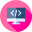 **TODO!** Check Zipf's law for BBC News and Amazon Reviews.

In [111]:
sources = bbcamazon.source.drop_duplicates().tolist()
sources

['bbcnews', 'amazon']

Counter({'the': 44534, '.': 40865, ',': 35444, 'to': 24546, '"': 20421, 'of': 19789, 'and': 17972, 'a': 17214, 'in': 16432, 'is': 8525, 'for': 8488, 'The': 8008, 'that': 7801, 'said': 7244, 'on': 7154, 'was': 6021, 'be': 5772, 'it': 5351, 'with': 5124, 'has': 4949, 'have': 4735, 'as': 4638, 'will': 4416, 'are': 4380, 'at': 4341, 'by': 4337, 'he': 4225, '-': 3818, 'from': 3474, 'not': 3401, 'I': 3250, 'Mr': 3004, 'his': 2827, 'an': 2687, 'but': 2634, 'which': 2582, 'had': 2572, 'would': 2568, 'been': 2470, 'they': 2445, 'their': 2345, 'this': 2237, '(': 2203, 'more': 2199, 'were': 2192, ')': 2184, 'its': 2176, 'also': 2102, 'who': 2037, '%': 1956, 'up': 1930, 'people': 1855, 'But': 1787, 'about': 1749, 'we': 1721, 'It': 1642, ':': 1642, 'or': 1616, "'": 1614, 'than': 1600, 'year': 1575, 'out': 1569, 'He': 1556, 'after': 1539, 'can': 1522, 'could': 1492, 'one': 1478, 'US': 1462, 'new': 1459, '£': 1392, 'all': 1342, 'over': 1340, 'there': 1239, 'last': 1233, 'first': 1233, '$': 1203, 'you

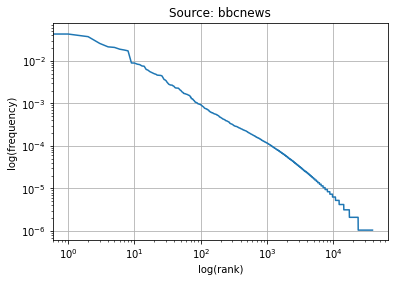

Counter({'.': 471725, 'the': 293036, 'I': 218968, 'and': 182785, 'to': 174173, ',': 171711, 'it': 167941, 'a': 159775, 'is': 98764, 'for': 89896, 'of': 87605, 'but': 69215, 'in': 68738, 'this': 68325, 'my': 67247, 'was': 66889, 'not': 66201, '!': 56362, 'on': 55527, 'that': 53103, 'with': 49286, 'The': 48703, 'have': 45206, '’': 44934, 'as': 37738, 'are': 37566, 'so': 34092, 'It': 33883, 'you': 33545, 'like': 30704, 'they': 30506, 'very': 30381, 'be': 29631, 'one': 28849, 'them': 26184, 'good': 23615, 'product': 23243, 'would': 23089, 'had': 22800, 'This': 22781, 'out': 22537, 'just': 22507, 'great': 22483, 'use': 21724, 'all': 21428, 'up': 21394, 't': 21328, 'at': 20858, 'these': 18934, 'get': 18831, 'or': 18627, 'will': 18252, 'me': 18240, 'well': 18080, 'when': 18057, 'from': 17198, 'if': 16946, 'than': 16838, 'work': 16505, 'only': 15997, 'more': 15559, 'can': 15442, 'time': 15361, 'too': 15258, 'off': 15142, 'really': 14981, 'were': 14969, 'because': 14596, 'quality': 14068, '...'

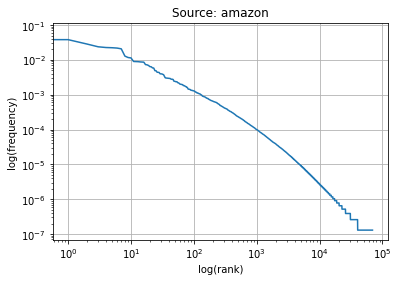

In [ ]:
for source in sources:
  # plot the curves

### 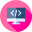 **TODO!** Create a report of the concatenated dataframe

Tip: to save some RAM, create a mini dataframe ignoring text columns such as `content_tokenized`. You may use the `.drop()` function

Now let's create a report again. As our dataset is bigger, the iframe creation should take too much time. Let's use a version without the tokenized content and tokenized title.

In [ ]:
# We remove the text columns because generating the iframe takes a lot of time and RAM
mini_bbcamazon = # code me

In [ ]:
# Let's create an automatic and interactive report of the BBCAmazon dataframe
profile = ProfileReport(mini_bbcamazon, title="BBC News x Amazon", html={"style": {"full_width": True}})

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Take a look at the correlations, which correlation metric is the best one to differenciate the different content and title lengths?

The Kendall's correlation shows a slight difference between content tokenized and not tokenized based on their lengths.

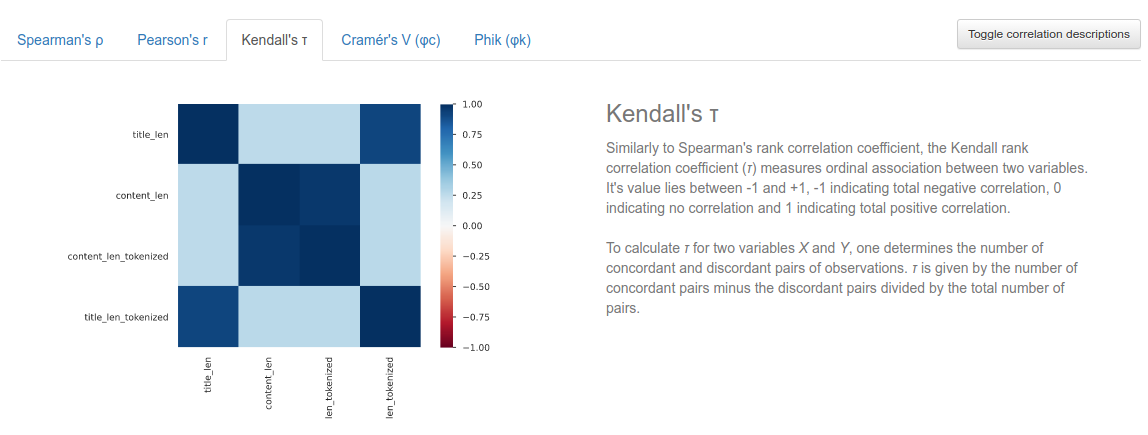

In [ ]:
# let's save some RAM
del mini_bbcamazon


# <font color="chillipepper">**Topic Modelling**</font>

In this part you don't need to do anything. Just analyze the following code as an example given to you.


### Use Gensim's LDA to compute a topic model. 


In [ ]:
from gensim.models import LdaModel
from gensim import corpora
import nltk
from string import punctuation

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
to_be_removed = list(en_stop) + list(punctuation)

tok = TreebankWordTokenizer()
# Tokenizing + removing stopwords
text_data = list(bbcamazon[bbcamazon.source=='bbcnews'].content.apply(lambda x: list(filter(lambda a: a.lower() not in to_be_removed,tok.tokenize(x)))).array)
print(text_data[0])
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

ldamodel = LdaModel(corpus, id2word=dictionary, num_topics=4)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['Quarterly', 'profits', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '1.13bn', '£600m', 'three', 'months', 'December', '639m', 'year-earlier.', 'firm', 'one', 'biggest', 'investors', 'Google', 'benefited', 'sales', 'high-speed', 'internet', 'connections', 'higher', 'advert', 'sales.', 'TimeWarner', 'said', 'fourth', 'quarter', 'sales', 'rose', '2', '11.1bn', '10.9bn.', 'profits', 'buoyed', 'one-off', 'gains', 'offset', 'profit', 'dip', 'Warner', 'Bros', 'less', 'users', 'AOL.', 'Time', 'Warner', 'said', 'Friday', 'owns', '8', 'search-engine', 'Google.', 'internet', 'business', 'AOL', 'mixed', 'fortunes.', 'lost', '464,000', 'subscribers', 'fourth', 'quarter', 'profits', 'lower', 'preceding', 'three', 'quarters.', 'However', 'company', 'said', 'AOL', "'s", 'underlying', 'profit', 'exceptional', 'items', 'rose', '8', 'back', 'stronger', 'internet', 'advertising

### Use PyLDAvis to visualise the topic model. What are the different topic clusters?


In [ ]:
!pip install pyLDAvis


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_display = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

Topic modelling not very relevant here.